In [331]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [335]:
data = loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

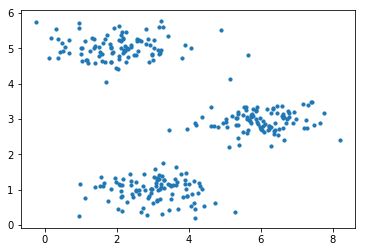

In [336]:
plt.scatter(X[:,0], X[:,1], s=10)

In [345]:
def init_centroids(X,k):
    centroids = []
    mask = np.random.randint(0, X.shape[0], k)
    centroids = X[mask]
    
    return centroids

In [338]:
def assign_cluster(X, centroids, k):
    m = X.shape[0]
    cluster_index = np.zeros(m)
    dists = np.zeros(k)
    for i in range(m):
        dists = np.sum((centroids - X[i])**2, axis=1)
        cluster_index[i] = dists.argmin()
    
    return cluster_index
    

In [354]:
def new_centroids(X, centroids, k):
    cluster_index = assign_cluster(X, centroids, k)
    new_center = np.zeros(centroids.shape[1]*k).reshape(k, centroids.shape[1])
    for i in range(k):
        new_center[i] = np.mean(X[cluster_index == i], axis=0)
    
    return new_center

In [340]:
def run_k_means(X, k, iters):
    centroids = init_centroids(X, k)
    for i in range(iters):
        cluster_index = assign_cluster(X, centroids, k)
        centroids = new_centroids(X, centroids, k)
        
    return cluster_index, centroids
    

In [341]:
k = 3
idx, centroids = run_k_means(X, k, 200)

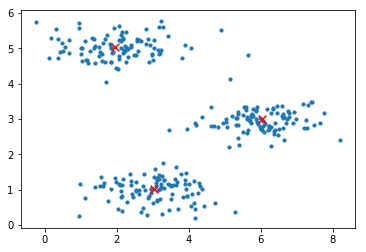

In [342]:
plt.scatter(X[:,0], X[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], s=60, c='r', marker='x')

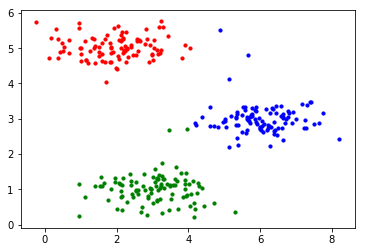

In [343]:
colours = ['r', 'g', 'b', 'm', 'y', 'k']
for i in range(3):
    cluster = X[np.where(idx == i)]
    plt.scatter(cluster[:,0], cluster[:,1], s=10, c=colours[i])

(128, 128, 3)

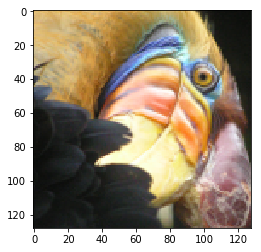

In [406]:
#Compressing an image using K Means clustering----------------------------------------------------------

import matplotlib.image as img
import matplotlib.pylab as pylab
image = img.imread('bird.png')
plt.imshow(image)
image.shape

In [407]:
X = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
X[0]

array([ 0.85882354,  0.70588237,  0.40392157], dtype=float32)

In [414]:
k = 70
idx, centroids = run_k_means(X, k, 20)

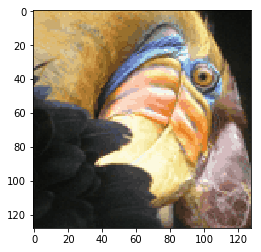

In [415]:
X_compressed = centroids[idx.astype(int)]
X_compressed = X_compressed.reshape((image.shape[0], image.shape[1], image.shape[2]))
plt.imshow(X_compressed)

In [418]:
#Principal Component Analysis
from scipy.io import loadmat

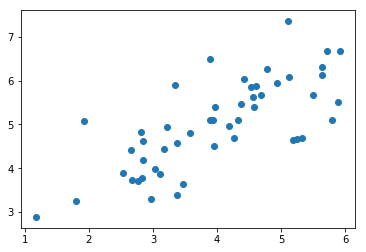

In [434]:
data = loadmat('ex7data1.mat')
X = data['X']
plt.scatter(X[:,0], X[:,1])

In [436]:
X = np.matrix(X)
X.mean()

4.4960355659209883

In [443]:
def pca(X):
    X = np.matrix(X)
    X = (X - X.mean()) / X.std()
    
    cov = (X.T * X) / X.shape[0]
    
    U, S, V = np.linalg.svd(cov)
    
    return U,S,V


In [444]:
U, S, V = pca(X)
U,S,V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([ 1.43584536,  0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [445]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [459]:
Z = project_data(X,U,1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [462]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)


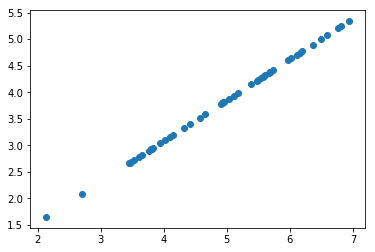

In [467]:
X_recovered = recover_data(Z, U, 1)
plt.scatter(X_recovered[:,0], X_recovered[:,1])